In [23]:
# Level 3 Task 1: Predictive Modeling (Classification) - Customer Churn Prediction
# Codveda Technology - Data Analytics Internship

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



In [24]:
print("="*60)
print("LEVEL 3 TASK 1: PREDICTIVE MODELING (CLASSIFICATION)")
print("Customer Churn Prediction Analysis")
print("="*60)

# Load the dataset
df = pd.read_csv(r"C:\Users\engah\OneDrive\Desktop\Codveda\Data Set For Task\Churn Prdiction Data\churn-bigml-80.csv")

print(f"\nDataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")

# Display basic info about the dataset
print("\n" + "="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Missing Values per Column:")
print(df.isnull().sum())

print(f"\nTarget Variable Distribution:")
churn_counts = df['Churn'].value_counts()
print(f"No Churn (False): {churn_counts[False]} ({churn_counts[False]/len(df)*100:.1f}%)")
print(f"Churn (True): {churn_counts[True]} ({churn_counts[True]/len(df)*100:.1f}%)")



LEVEL 3 TASK 1: PREDICTIVE MODELING (CLASSIFICATION)
Customer Churn Prediction Analysis

Dataset Shape: (2666, 20)
Total Records: 2666
Total Features: 20

DATASET OVERVIEW
Missing Values per Column:
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Target Variable Distribution:
No Churn (False): 2278 (85.4%)
Churn (True): 388 (14.6%)


In [25]:
# Data Preprocessing
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Handle categorical variables
print("Encoding categorical variables...")
label_encoders = {}
categorical_columns = ['State', 'International plan', 'Voice mail plan']

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"✓ Encoded {col}")

# Convert boolean target to integer
df_processed['Churn'] = df_processed['Churn'].astype(int)

# Prepare features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Feature scaling completed")




DATA PREPROCESSING
Encoding categorical variables...
✓ Encoded State
✓ Encoded International plan
✓ Encoded Voice mail plan

Features shape: (2666, 19)
Target shape: (2666,)

Training set size: 2132
Test set size: 534
✓ Feature scaling completed


In [26]:
# Model Training and Evaluation
print("\n" + "="*60)
print("MODEL TRAINING AND EVALUATION")
print("="*60)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Use scaled data for Logistic Regression, original for tree-based models
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Model Comparison
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'Precision': [results[model]['precision'] for model in results.keys()],
    'Recall': [results[model]['recall'] for model in results.keys()],
    'F1-Score': [results[model]['f1_score'] for model in results.keys()]
})

print(comparison_df.round(4))

# Find best model
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
best_model = results[best_model_name]['model']

print(f"\nBest Model: {best_model_name} (F1-Score: {results[best_model_name]['f1_score']:.4f})")




MODEL TRAINING AND EVALUATION

--- Logistic Regression ---
Accuracy: 0.8371
Precision: 0.3784
Recall: 0.1795
F1-Score: 0.2435

--- Decision Tree ---
Accuracy: 0.9007
Precision: 0.6623
Recall: 0.6538
F1-Score: 0.6581

--- Random Forest ---
Accuracy: 0.9513
Precision: 0.9815
Recall: 0.6795
F1-Score: 0.8030

MODEL COMPARISON
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.8371     0.3784  0.1795    0.2435
1        Decision Tree    0.9007     0.6623  0.6538    0.6581
2        Random Forest    0.9513     0.9815  0.6795    0.8030

Best Model: Random Forest (F1-Score: 0.8030)


In [27]:
# Hyperparameter Tuning for Best Model
print("\n" + "="*60)
print("HYPERPARAMETER TUNING")
print("="*60)

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
elif best_model_name == 'Decision Tree':
    param_grid = {
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
else:  # Logistic Regression
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }

print(f"Performing Grid Search for {best_model_name}...")

# Perform grid search
grid_search = GridSearchCV(
    estimator=models[best_model_name],
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=0
)

# Use appropriate data for grid search
if best_model_name == 'Logistic Regression':
    grid_search.fit(X_train_scaled, y_train)
    best_predictions = grid_search.predict(X_test_scaled)
    best_probabilities = grid_search.predict_proba(X_test_scaled)[:, 1]
else:
    grid_search.fit(X_train, y_train)
    best_predictions = grid_search.predict(X_test)
    best_probabilities = grid_search.predict_proba(X_test)[:, 1]

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Evaluate tuned model
tuned_accuracy = accuracy_score(y_test, best_predictions)
tuned_precision = precision_score(y_test, best_predictions)
tuned_recall = recall_score(y_test, best_predictions)
tuned_f1 = f1_score(y_test, best_predictions)

print(f"\nTuned Model Performance:")
print(f"Accuracy: {tuned_accuracy:.4f}")
print(f"Precision: {tuned_precision:.4f}")
print(f"Recall: {tuned_recall:.4f}")
print(f"F1-Score: {tuned_f1:.4f}")




HYPERPARAMETER TUNING
Performing Grid Search for Random Forest...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 0.7994

Tuned Model Performance:
Accuracy: 0.9532
Precision: 0.9818
Recall: 0.6923
F1-Score: 0.8120



DETAILED CLASSIFICATION REPORT

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.95      1.00      0.97       456
       Churn       0.98      0.69      0.81        78

    accuracy                           0.95       534
   macro avg       0.97      0.85      0.89       534
weighted avg       0.95      0.95      0.95       534


Confusion Matrix:
[[455   1]
 [ 24  54]]

GENERATING VISUALIZATIONS


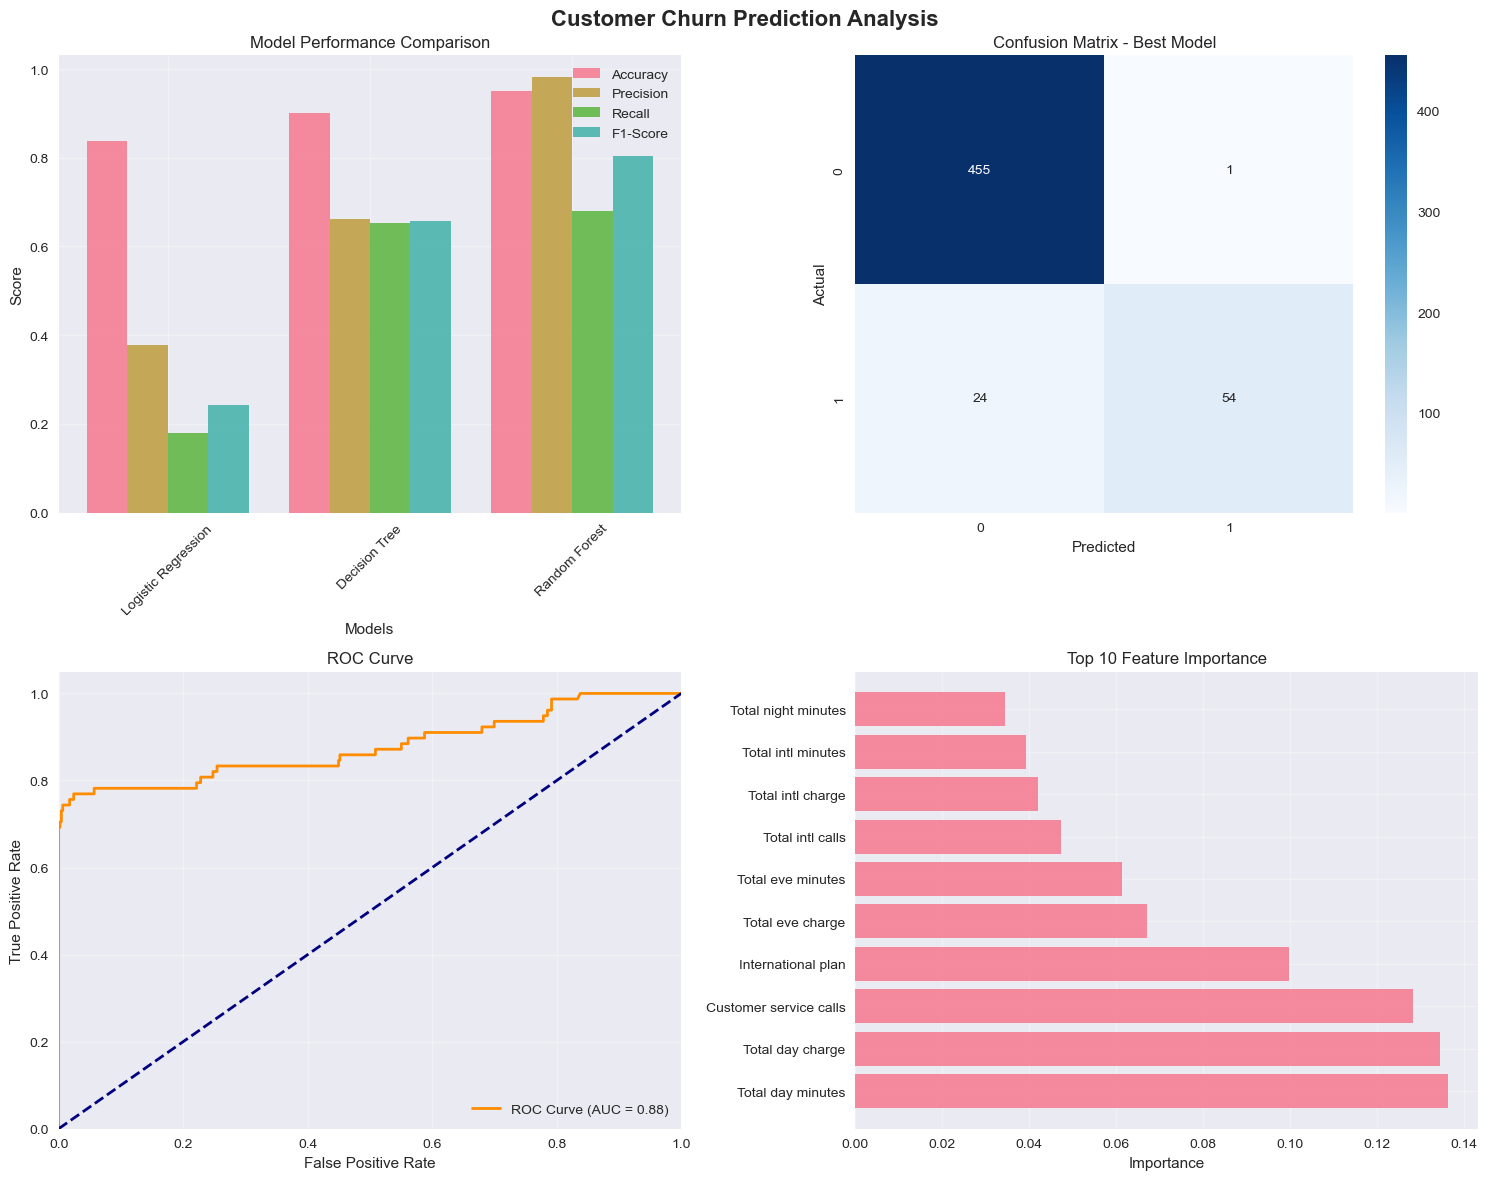

In [28]:
# Detailed Classification Report
print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORT")
print("="*60)

print("\nClassification Report:")
print(classification_report(y_test, best_predictions, target_names=['No Churn', 'Churn']))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, best_predictions)
print(cm)

# Visualizations
print("\n" + "="*60)
print("GENERATING VISUALIZATIONS")
print("="*60)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Customer Churn Prediction Analysis', fontsize=16, fontweight='bold')

# 1. Model Comparison
ax1 = axes[0, 0]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(comparison_df))
width = 0.2

for i, metric in enumerate(metrics):
    ax1.bar(x + i*width, comparison_df[metric], width, label=metric, alpha=0.8)

ax1.set_xlabel('Models')
ax1.set_ylabel('Score')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels(comparison_df['Model'], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Confusion Matrix Heatmap
ax2 = axes[0, 1]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Confusion Matrix - Best Model')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

# 3. ROC Curve
ax3 = axes[1, 0]
fpr, tpr, _ = roc_curve(y_test, best_probabilities)
roc_auc = auc(fpr, tpr)

ax3.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
ax3.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curve')
ax3.legend(loc="lower right")
ax3.grid(True, alpha=0.3)

# 4. Feature Importance (for tree-based models)
ax4 = axes[1, 1]
if best_model_name in ['Random Forest', 'Decision Tree']:
    feature_importance = grid_search.best_estimator_.feature_importances_
    feature_names = X.columns
    
    # Get top 10 features
    indices = np.argsort(feature_importance)[::-1][:10]
    
    ax4.barh(range(len(indices)), feature_importance[indices], alpha=0.8)
    ax4.set_yticks(range(len(indices)))
    ax4.set_yticklabels([feature_names[i] for i in indices])
    ax4.set_xlabel('Importance')
    ax4.set_title('Top 10 Feature Importance')
    ax4.grid(True, alpha=0.3)
else:
    # For logistic regression, show coefficient magnitude
    coef = np.abs(grid_search.best_estimator_.coef_[0])
    feature_names = X.columns
    
    # Get top 10 features
    indices = np.argsort(coef)[::-1][:10]
    
    ax4.barh(range(len(indices)), coef[indices], alpha=0.8)
    ax4.set_yticks(range(len(indices)))
    ax4.set_yticklabels([feature_names[i] for i in indices])
    ax4.set_xlabel('Coefficient Magnitude')
    ax4.set_title('Top 10 Feature Coefficients')
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [37]:
# Summary and Insights
print("\n" + "="*60)
print("SUMMARY AND INSIGHTS")
print("="*60)

print(f"✓ Successfully trained and evaluated {len(models)} classification models")
print(f"✓ Best performing model: {best_model_name}")
print(f"✓ Achieved {tuned_f1:.1%} F1-Score after hyperparameter tuning")
print(f"✓ Model can predict customer churn with {tuned_accuracy:.1%} accuracy")

# Business insights
churn_rate = y.mean()
print(f"\nBusiness Insights:")
print(f"• Current churn rate: {churn_rate:.1%}")
print(f"• Model precision: {tuned_precision:.1%} (of predicted churners, {tuned_precision:.1%} actually churn)")
print(f"• Model recall: {tuned_recall:.1%} (of actual churners, {tuned_recall:.1%} are correctly identified)")

# Key features driving churn
if best_model_name in ['Random Forest', 'Decision Tree']:
    feature_importance = grid_search.best_estimator_.feature_importances_
    top_feature_idx = np.argmax(feature_importance)
    top_feature = X.columns[top_feature_idx]
    print(f"• Most important feature for churn prediction: {top_feature}")

print(f"\n✓ Analysis completed successfully!")
print(f"✓ Model ready for deployment and churn prediction")

# Optional: Save the model
import joblib
joblib.dump(grid_search.best_estimator_, 'best_churn_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
print(f"✓ Model and scaler saved for future use")

print("\n" + "="*60)
print("TASK COMPLETED ")
print("="*60)


SUMMARY AND INSIGHTS
✓ Successfully trained and evaluated 3 classification models
✓ Best performing model: Random Forest
✓ Achieved 81.2% F1-Score after hyperparameter tuning
✓ Model can predict customer churn with 95.3% accuracy

Business Insights:
• Current churn rate: 14.6%
• Model precision: 98.2% (of predicted churners, 98.2% actually churn)
• Model recall: 69.2% (of actual churners, 69.2% are correctly identified)
• Most important feature for churn prediction: Total day minutes

✓ Analysis completed successfully!
✓ Model ready for deployment and churn prediction
✓ Model and scaler saved for future use

TASK COMPLETED 
